Notebook to review/learn SVD on images

In [315]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, norm

import imageio.v3 as iio
from skimage import color

Here is our image:

shape: (1904, 1428, 3)


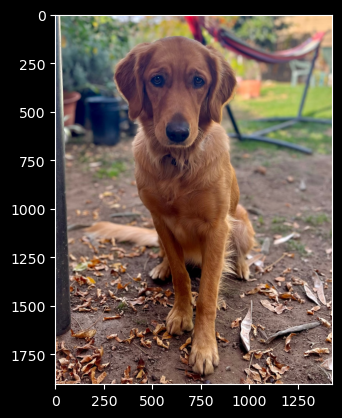

In [316]:
# Load Image
img = iio.imread('Blitzen.jpg')
print("shape:", np.shape(img))
plt.imshow(img)
plt.show()

shape: (1904, 1428)


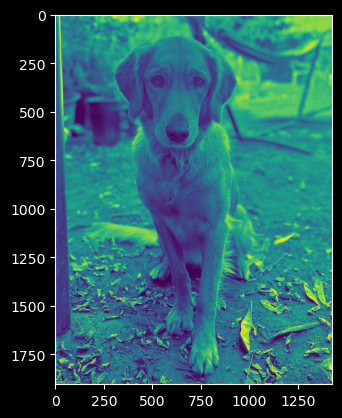

In [317]:
# First we make it greyscale:
img_gray = color.rgb2gray(img)
print("shape:", np.shape(img_gray))
plt.imshow(img_gray)
plt.show()


In [318]:
A = img_gray # input matrix
xdim, ydim = np.shape(A)
print("shape:", np.shape(A))

shape: (1904, 1428)


In [319]:
# Perform SVD
u, s, v_t= svd(A, full_matrices=False)

m = 1904

n = 1428

$A_{m\times n} = U_{m\times m} \Sigma_{m\times n} V^T_{n \times n}$

Because of Matrix math if we only retain the first k singular values we can reduce the size of the matrices:

$A_{m\times n} = U_{m\times k} \Sigma_{k\times k} V^T_{k \times n}$

we still have:

A is an $m\times n$ matrix (but with less information)

In [320]:
# what percentage of the image would you like to retain?
percentage = 10
k = int((percentage/100) * min(xdim, ydim))
print (f"keeping {percentage}% of the singular values, gives", k, "singular values")

keeping 10% of the singular values, gives 142 singular values


shape: (1904, 1428)


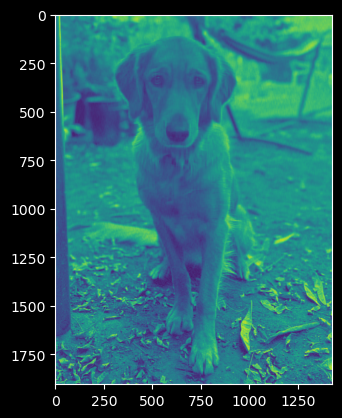

In [321]:
# Reconstruct the image
A_hat = np.dot(u[:, :k], np.dot(np.diag(s[:k]), v_t[:k, :]))
print("shape:", np.shape(A_hat))
plt.imshow(A_hat)
plt.show()

In [322]:
# show the pixel difference
diff = A - A_hat
error = norm(diff, 'fro')/norm(A, 'fro')
print("norm of difference:", error)


norm of difference: 0.06793186008127818


Being in Grey scale make our job easier but we can also perfom svd on color images.

In [323]:
# Initialize an empty array to store the reconstructed channels
reconstructed_img = np.zeros_like(img, dtype=np.float64)

print(f"keeping {percentage}% of the singular values, gives", k, "singular values")


err_sum = 0
for channel in range(img.shape[2]): # for each color channel
    print("SVD on channel:", channel)
    A = img[:, :, channel]  # input matrix

    # Perform SVD
    u, s, v_t = svd(A, full_matrices=False)

    # Reconstruct the image
    A_hat = np.dot(u[:, :k], np.dot(np.diag(s[:k]), v_t[:k, :]))

    # Store the reconstructed channel
    reconstructed_img[:, :, channel] = A_hat
    diff = A - A_hat
    error = norm(diff, 'fro')/norm(A, 'fro')
    print("norm of difference:", error)
    err_sum += error

print("average error:", err_sum / img.shape[2])

keeping 10% of the singular values, gives 142 singular values
SVD on channel: 0
norm of difference: 0.059601052257685076
SVD on channel: 1
norm of difference: 0.06965399013570127
SVD on channel: 2
norm of difference: 0.07896467224202462
average error: 0.06940657154513698


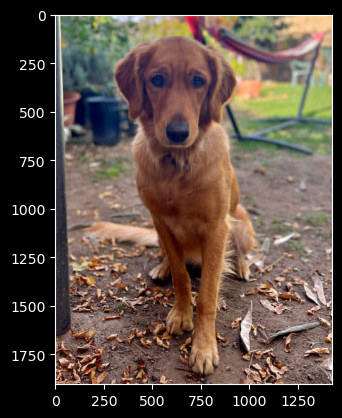

norm of difference: 0.06940657154513698


In [324]:
# Clip values to be in the valid range [0, 255] and convert to uint8
# print(reconstructed_img)
reconstructed_img = np.clip(reconstructed_img, 0, 255).astype(np.uint8)

# Display the reconstructed image
plt.imshow(reconstructed_img)
plt.show()

diff = img - reconstructed_img
print(f"norm of difference:", err_sum / img.shape[2])

In [325]:
import os

# Save original and reconstructed images
original_file = "original_svd_image.jpg"
compressed_file = f"compressed_svd_image.jpg"

# Save the images
iio.imwrite(original_file, img)
iio.imwrite(compressed_file, reconstructed_img)

# Get file sizes
original_size = os.path.getsize(original_file)
compressed_size = os.path.getsize(compressed_file)

# Compare sizes
size_difference = original_size - compressed_size
percentage_change = (size_difference / original_size) * 100

print(f"Original image size: {original_size:,} bytes")
print(f"Compressed image size: {compressed_size:,} bytes")

if size_difference > 0:
    print(f"Size reduction: {size_difference:,} bytes ({percentage_change:.2f}%)")
else:
    print(f"Size increase: {-size_difference:,} bytes ({-percentage_change:.2f}%)")

# Calculate theoretical storage for SVD representation
total_pixels = img.shape[0] * img.shape[1]
total_elements = total_pixels * img.shape[2]  # Elements in original image (RGB)

# For each channel: U matrix (img.shape[0] × k), singular values (k), V^T matrix (k × img.shape[1])
svd_elements_per_channel = (img.shape[0] * k) + k + (k * img.shape[1])
svd_elements_total = svd_elements_per_channel * img.shape[2]  # For all channels

svd_compression_ratio = total_elements / svd_elements_total
svd_reduction_percentage = (1 - (svd_elements_total / total_elements)) * 100

print(f"\nSVD representation storage (theoretical):")
print(f"Original elements: {total_elements:,}")
print(f"SVD elements: {svd_elements_total:,}")
print(f"Matrix compression ratio: {svd_compression_ratio:.2f}x")
print(f"Matrix size reduction: {svd_reduction_percentage:.2f}%")

Original image size: 364,013 bytes
Compressed image size: 336,462 bytes
Size reduction: 27,551 bytes (7.57%)

SVD representation storage (theoretical):
Original elements: 8,156,736
SVD elements: 1,419,858
Matrix compression ratio: 5.74x
Matrix size reduction: 82.59%
